In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score

C:\Users\HASEE\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [5]:
df = pd.read_csv('./digit recognizor.csv')
df.shape

(42000, 785)

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X.shape

(42000, 784)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)
X_pca = pca.fit_transform(X)

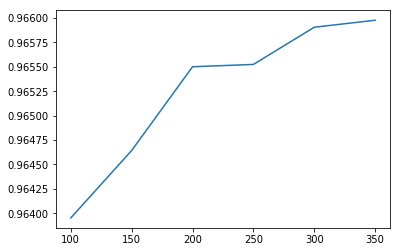

In [16]:
from sklearn.ensemble import RandomForestClassifier
scores = []
i_range = range(100,400,50)
for i in i_range:
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=0),X,y,cv=5).mean())
plt.plot(i_range,scores)
plt.show()

In [18]:
print(np.max(scores))
print(100 + scores.index(np.max(scores))*50)

0.9659763009762562
350


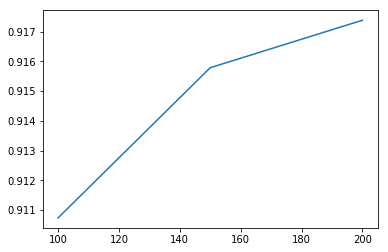

0.9173817801393616
200


In [19]:
#使用pca
from sklearn.ensemble import RandomForestClassifier
scores = []
i_range = range(100,250,50)
for i in i_range:
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=0),X_pca,y,cv=5).mean())
plt.plot(i_range,scores)
plt.show()
print(np.max(scores))
print(100 + scores.index(np.max(scores))*50)

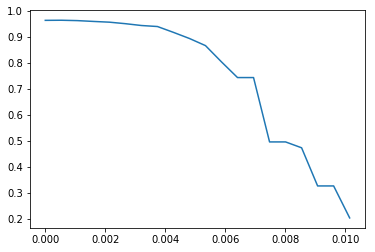

In [22]:
from sklearn.feature_selection import SelectFromModel
#利用学习曲线进行判断
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)
score = []
for i in threshold:
    X_embedded = SelectFromModel(RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=0),threshold=i).fit_transform(X,y)
    once = cross_val_score(RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=0),X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()